In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [ ]:
train = pd.read_csv('/Users/x/Downloads/tabular-playground-series-aug-2021/train.csv')
test = pd.read_csv('/Users/x/Downloads/tabular-playground-series-aug-2021/test.csv')
sample_submission = pd.read_csv('/Users/lucywilliams/Downloads/tabular-playground-series-aug-2021/sample_submission.csv')

In [ ]:
print(f'Train Shape :  {train.shape}')

In [ ]:
print(f'Test Shape :  {test.shape}')

In [ ]:
target = train['loss']
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [50]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,-1.668045,0.179768,0.498854,-1.767452,-0.585085,1.548611,-0.731714,1.096083,-0.163171,-0.996718,...,-0.576275,0.287884,-0.636568,1.048811,-0.066279,-0.659995,1.706200,1.113531,0.432237,15
1,0.887510,2.208234,-0.431857,-0.732528,3.907814,-0.863906,-0.021877,0.556142,-0.129652,0.912720,...,-0.592941,-0.988442,-0.360043,-0.977224,-0.390478,-1.790770,-0.433968,1.218930,-1.222692,3
2,-0.628150,-0.763705,-0.408204,-0.546028,-0.364251,2.101452,-0.727663,-1.095000,0.178041,0.518736,...,-0.570408,0.985834,1.358390,0.439352,-0.101587,-0.224966,0.917008,0.185501,0.753750,6
3,-0.975889,-0.810879,-0.547278,1.131234,-0.611685,-0.753071,0.113171,1.238672,-0.643465,-0.993810,...,-0.570146,-1.478323,-0.595755,0.744873,-1.272692,0.235002,0.352117,-0.186368,0.350606,2
4,-0.232366,-0.740119,0.651167,-0.179911,-0.579810,0.748861,-0.503574,-0.749140,0.077481,-0.891402,...,-0.537094,-0.469704,-0.327684,-0.946548,-0.017820,-0.248517,1.277657,0.321752,-0.172972,1


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(100), int64(1)
memory usage: 192.6 MB


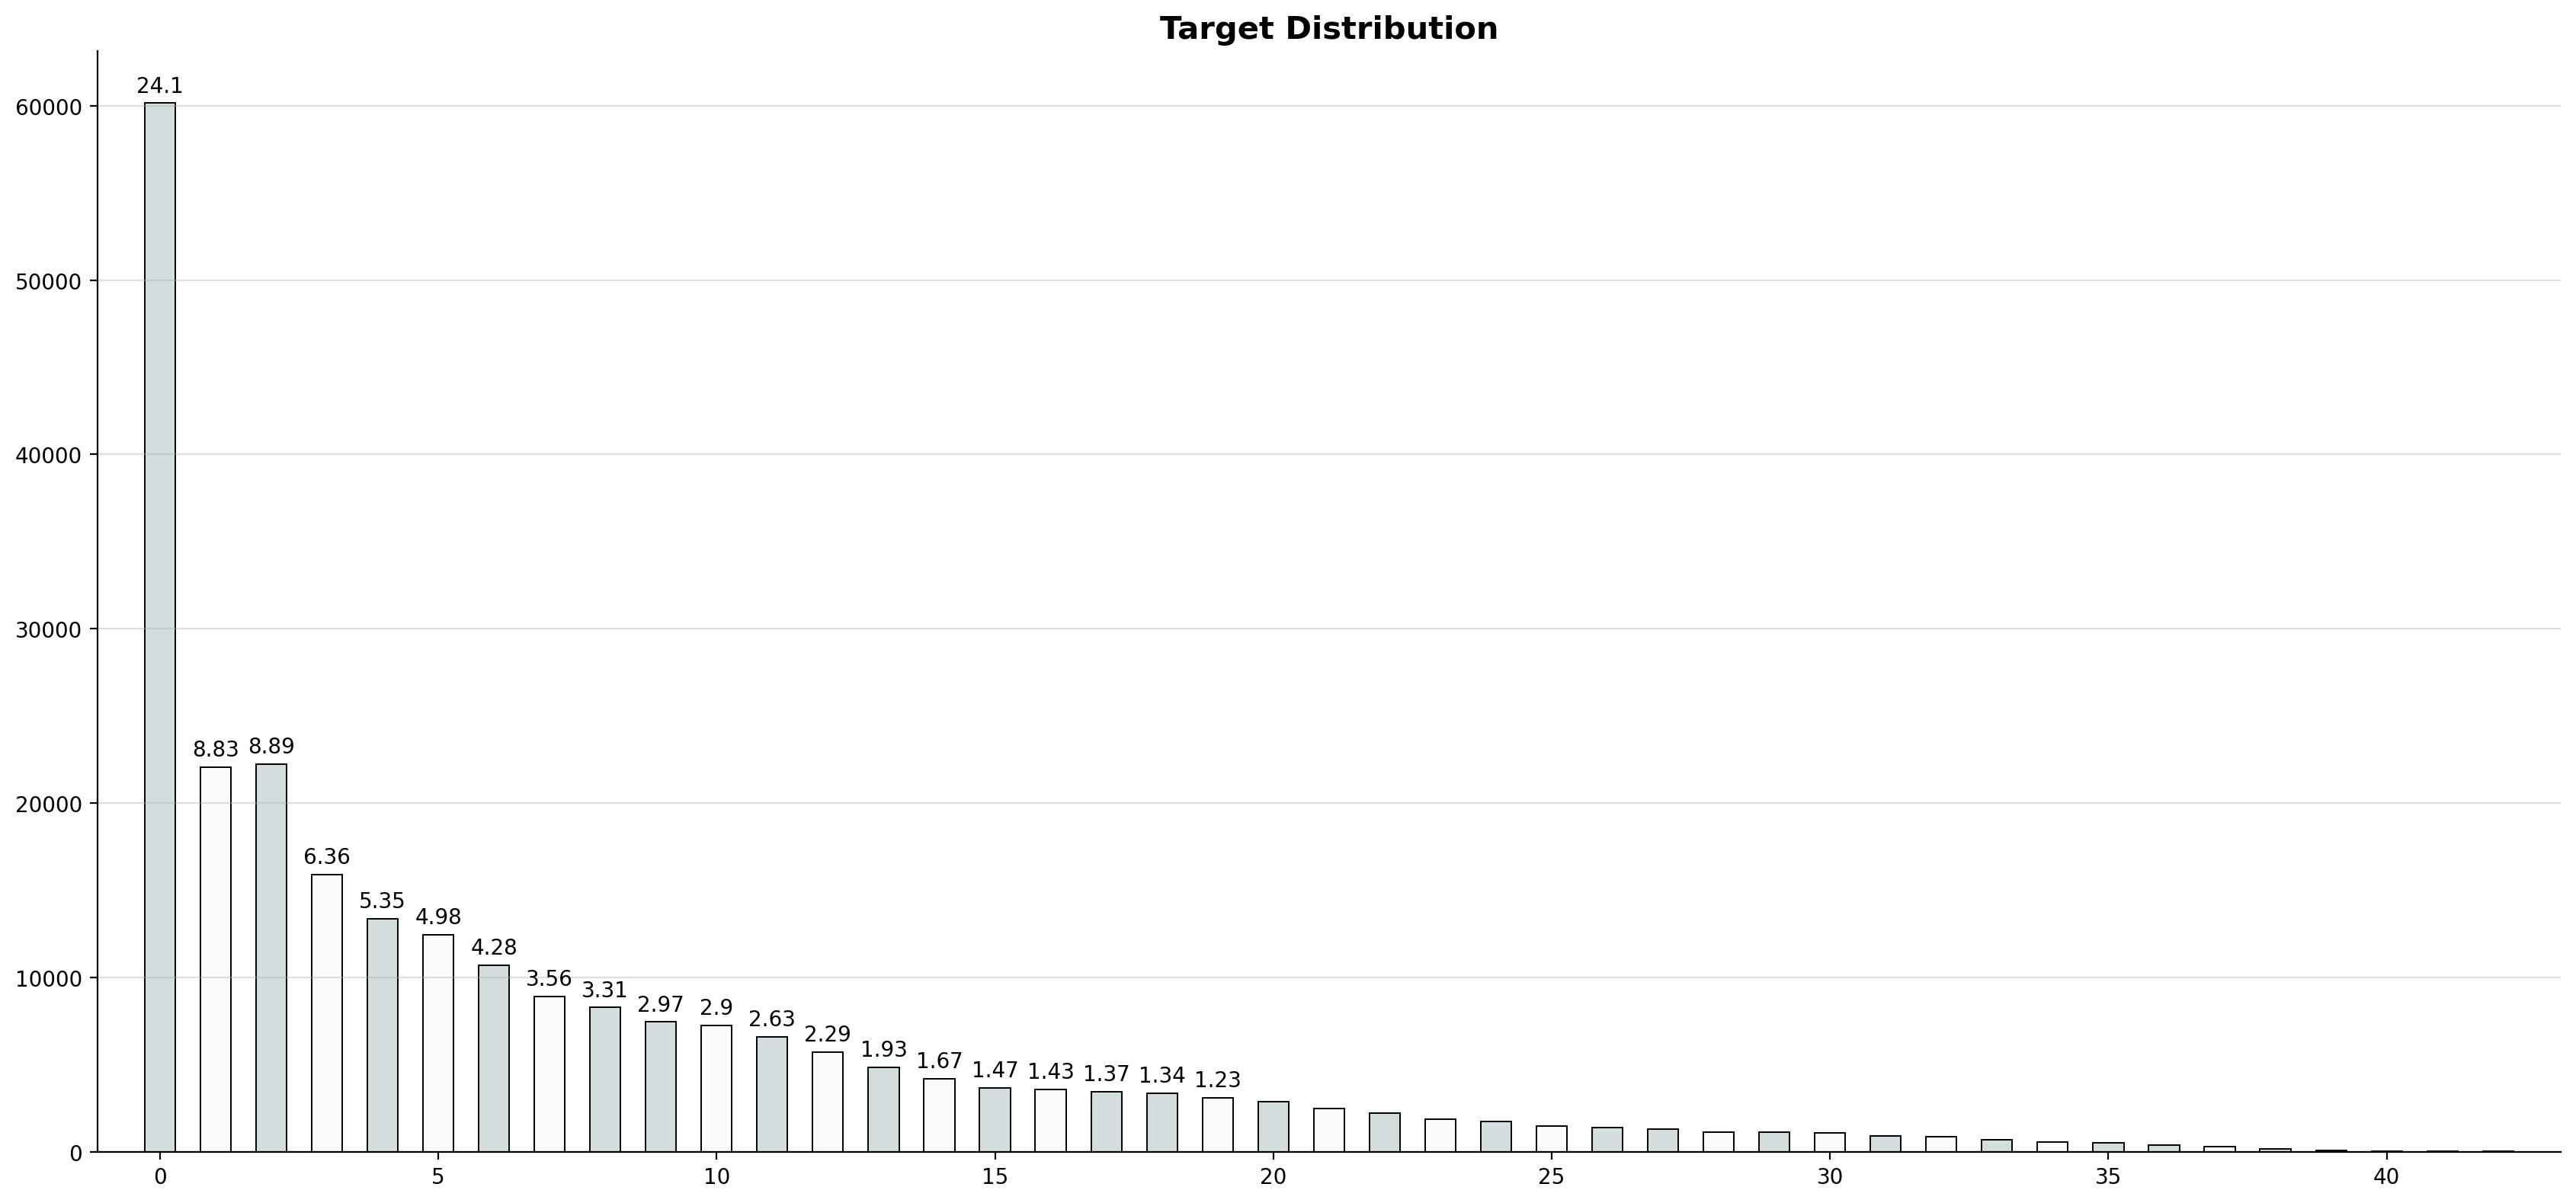

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))

target_cnt = train['loss'].value_counts().sort_index()

ax.bar(target_cnt.index, target_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(9)],
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax.margins(0.02, 0.05)

for i in range(20):
    ax.annotate(f'{target_cnt[i]/len(train)*100:.3}', xy=(i, target_cnt[i]+1000),
                   va='center', ha='center',
               )

ax.set_title('Target Distribution', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

fig.tight_layout()
plt.show()

In [53]:
target_cnt_df = pd.DataFrame(target_cnt)
target_cnt_df['ratio(%)'] = target_cnt_df/target_cnt.sum()*100
target_cnt_df.sort_values('ratio(%)', ascending=False, inplace=True)
target_cnt_df['cumulative_sum(%)'] = target_cnt_df['ratio(%)'].cumsum()
target_cnt_df.style.bar(subset=['cumulative_sum(%)'], color='#205ff2')

,loss,ratio(%),cumulative_sum(%)
0,60144,24.057600,24.057600
2,22225,8.890000,32.947600
1,22069,8.827600,41.775200
3,15902,6.360800,48.136000
4,13371,5.348400,53.484400
5,12458,4.983200,58.467600
6,10697,4.278800,62.746400
7,8894,3.557600,66.304000
8,8264,3.305600,69.609600
9,7435,2.974000,72.583600
